In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as skm
from sklearn import preprocessing
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# read file
df = pd.read_csv('winequality-red.csv', header = 0, delimiter=';')
headers = df.columns
data = df.values

# shift wine quality values from (3-8) to (0-5)
y = df.quality
y -= 3
# drop fixed acidity feature
X = df.drop(['fixed acidity', 'quality'],axis=1)

# 64/16/20 training/meta training(validation)/test split
# 80/20 training/test split
X_train, X_test, y_train, y_test = skm.train_test_split(X,y,test_size = 0.2, stratify=y, random_state=42)
# 80/20 training/meta training(validation) split of training set
X_train, X_val, y_train, y_val = skm.train_test_split(X_train,y_train,test_size = 0.2, stratify=y_train, random_state=42)

# minmax preprocessing standardization of all features
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

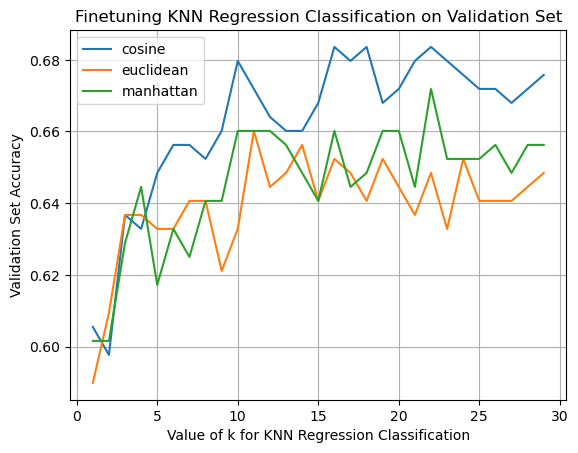

best k = 16
best metric = cosine


In [3]:
# grid search fine tuning k and distance metric of KNN on validation set
k_range = range(1, 30)
best_acc = 0.0
best_k = 1
best_metric = 'cosine'
metrics = ['cosine', 'euclidean', 'manhattan']
val_accuracies =[[], [], []]
for i, metric in enumerate(metrics):
    for j in k_range:
        knn = KNeighborsRegressor(n_neighbors=j, metric=metric, weights='distance', algorithm='brute')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        y_pred = np.around(y_pred)
        accuracy_val = accuracy_score(y_val, y_pred)
        val_accuracies[i].append(accuracy_val)
        if accuracy_val > best_acc:
            best_acc = accuracy_val
            best_k = j
            best_metric = metric
for i, metric in enumerate(metrics):
    plt.plot(k_range, val_accuracies[i], label=metric)
plt.title('Finetuning KNN Regression Classification on Validation Set')
plt.xlabel('Value of k for KNN Regression Classification')
plt.ylabel('Validation Set Accuracy')
plt.legend()
plt.grid()
plt.show()
print(f'best k = {best_k}')
print(f'best metric = {best_metric}')

In [4]:
# refit KNN with best hyperparameters and evaluate performance on training and test sets
knn = KNeighborsRegressor(n_neighbors=best_k, metric=best_metric, weights='distance', algorithm='brute')
knn.fit(X_train, y_train)
y_pred_val_raw1 = knn.predict(X_val)
y_pred_train = knn.predict(X_train)
y_pred_train = np.around(y_pred_train)
accuracy_report = classification_report(y_train+3, y_pred_train+3)
print('KNN Training Set Classification Report:')
print(accuracy_report)
y_pred_test = knn.predict(X_test)
y_pred_test = np.around(y_pred_test)
accuracy_report = classification_report(y_test+3, y_pred_test+3)
print('KNN Test Set Classification Report:')
print(accuracy_report)

KNN Training Set Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00       436
           6       1.00      1.00      1.00       408
           7       1.00      1.00      1.00       127
           8       1.00      1.00      1.00        12

    accuracy                           1.00      1023
   macro avg       1.00      1.00      1.00      1023
weighted avg       1.00      1.00      1.00      1023

KNN Test Set Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.74      0.74       136
           6       0.64      0.78      0.70       128
           7       0.75      0.53      0.62        40
           8       0.00      0.00      0.00         3

 

/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# train MLP on training set and evaluate performance on training and test sets
mlp = MLPRegressor(hidden_layer_sizes=((160,))\
                            ,max_iter=10000,\
                            random_state=30)
mlp.fit(X_train, y_train)
y_pred_val_raw2 = mlp.predict(X_val)
y_pred_train = mlp.predict(X_train)
y_pred_train = np.around(y_pred_train)
accuracy_report = classification_report(y_train+3, y_pred_train+3)
print('MLP Training Set Classification Report:')
print(accuracy_report)
y_pred_test = mlp.predict(X_test)
y_pred_test = np.around(y_pred_test)
accuracy_report = classification_report(y_test+3, y_pred_test+3)
print('MLP Test Set Classification Report:')
print(accuracy_report)

MLP Training Set Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        34
           5       0.68      0.78      0.73       436
           6       0.58      0.66      0.62       408
           7       0.56      0.28      0.37       127
           8       0.00      0.00      0.00        12

    accuracy                           0.63      1023
   macro avg       0.30      0.29      0.29      1023
weighted avg       0.59      0.63      0.60      1023

MLP Test Set Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.09      0.17        11
           5       0.64      0.74      0.68       136
           6       0.56      0.62      0.59       128
           7       0.71      0.30      0.42        40
           8       0.00      0.00      0.00         3

 

/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/op

In [6]:
# train random forest on training set and evaluate performance on training and test sets
rfr = RandomForestRegressor(random_state=30)
rfr.fit(X_train, y_train)
y_pred_val_raw3 = rfr.predict(X_val)
y_pred_train = rfr.predict(X_train)
y_pred_train = np.around(y_pred_train)
accuracy_report = classification_report(y_train+3, y_pred_train+3)
print('RFR Training Set Classification Report:')
print(accuracy_report)
y_pred_test = rfr.predict(X_test)
y_pred_test = np.around(y_pred_test)
accuracy_report = classification_report(y_test+3, y_pred_test+3)
print('RFR Test Set Classification Report:')
print(accuracy_report)

RFR Training Set Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.82      0.68      0.74        34
           5       0.98      0.99      0.98       436
           6       0.96      1.00      0.98       408
           7       0.96      0.90      0.93       127
           8       1.00      0.58      0.74        12

    accuracy                           0.96      1023
   macro avg       0.95      0.72      0.78      1023
weighted avg       0.96      0.96      0.96      1023

RFR Test Set Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.09      0.17        11
           5       0.70      0.73      0.71       136
           6       0.59      0.71      0.65       128
           7       0.68      0.42      0.52        40
           8       0.00      0.00      0.00         3

 

/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


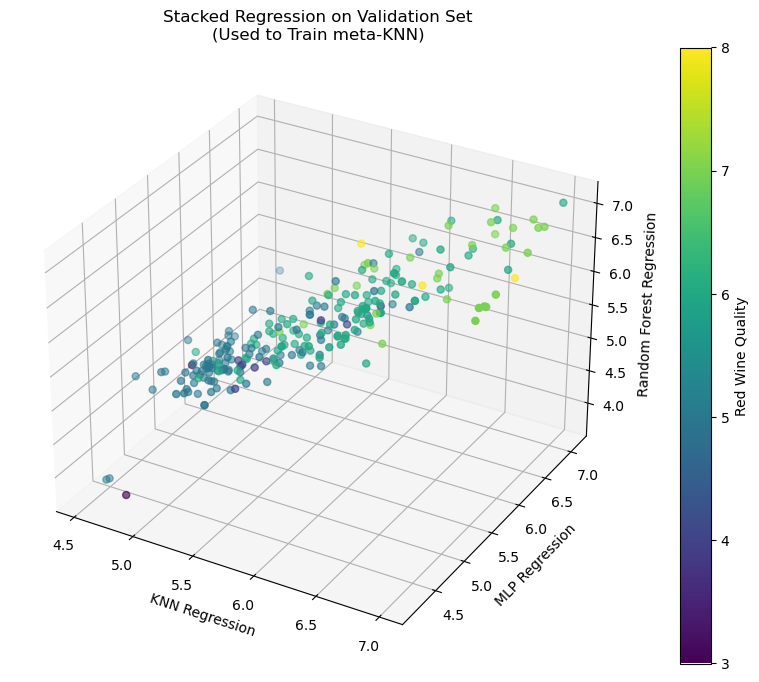

In [7]:
# plot regression results on validation set
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p = ax.scatter(y_pred_val_raw1+3, y_pred_val_raw2+3, y_pred_val_raw3+3, c=y_val+3, s=26, cmap='viridis')
fig.colorbar(p, label='Red Wine Quality')
ax.set_xlabel('KNN Regression')
ax.set_ylabel('MLP Regression')
ax.set_zlabel('Random Forest Regression')
plt.title('Stacked Regression on Validation Set\n(Used to Train meta-KNN)')
fig.set_figwidth(14)
fig.set_figheight(8)
plt.show()

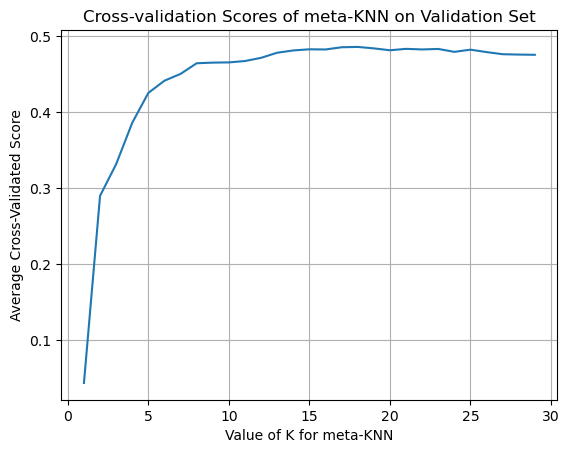

best k = 18


In [8]:
# create new feature matrix of validation set from stacked regression outputs
new = np.stack((y_pred_val_raw1, y_pred_val_raw2, y_pred_val_raw3), axis=1)
# finetune meta-KNN using k-fold cross validation of the validation set
k_range = range(1, 30)
k_scores = []
best_k = 1
best_score = 0.0
for j in k_range:
    meta_knn = KNeighborsRegressor(n_neighbors=j, weights='distance', algorithm='brute')
    scores = skm.cross_val_score(meta_knn,new,y_val)
    k_scores.append(scores.mean())
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = j
plt.plot(k_range,k_scores)
plt.title('Cross-validation Scores of meta-KNN on Validation Set')
plt.xlabel('Value of K for meta-KNN')
plt.ylabel('Average Cross-Validated Score')
plt.grid()
plt.show()
print(f'best k = {best_k}')

In [9]:
# train meta-KNN with finetuned k value and evaluate performance on training and test sets
meta_knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance', algorithm='brute')
meta_knn.fit(new, y_val)
train_raw1 = knn.predict(X_train)
train_raw2 = mlp.predict(X_train)
train_raw3 = rfr.predict(X_train)
train = np.stack((train_raw1, train_raw2, train_raw3), axis=1)
y_pred_raw = meta_knn.predict(train)
y_pred = np.around(y_pred_raw)
accuracy_report = classification_report(y_train+3, y_pred+3)
print('meta-KNN Training Set Classification Report:')
print(accuracy_report)
test_raw1 = knn.predict(X_test)
test_raw2 = mlp.predict(X_test)
test_raw3 = rfr.predict(X_test)
test = np.stack((test_raw1, test_raw2, test_raw3), axis=1)
y_pred_raw = meta_knn.predict(test)
y_pred = np.around(y_pred_raw)
accuracy_report = classification_report(y_test+3, y_pred+3)
print('meta-KNN Test Set Classification Report:')
print(accuracy_report)
accuracy_test = accuracy_score(y_test, y_pred)

meta-KNN Training Set Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        34
           5       0.92      1.00      0.95       436
           6       1.00      1.00      1.00       408
           7       0.91      1.00      0.95       127
           8       0.00      0.00      0.00        12

    accuracy                           0.95      1023
   macro avg       0.47      0.50      0.48      1023
weighted avg       0.90      0.95      0.92      1023

meta-KNN Test Set Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.79      0.77       136
           6       0.67      0.76      0.71       128
           7       0.72      0.53      0.61        40
           8       1.00      0.33      0.50   

/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jkevin/op

In [10]:
# fiter misclassified predictions of meta-knn model on test set
misclassed_label = []
misclassed_output = []
y_test = y_test.to_numpy()
for i in range(len(y_test)):
    if y_pred[i] != y_test[i]:
        misclassed_label.append(y_test[i])
        misclassed_output.append(y_pred_raw[i])
misclassed_label = np.array(misclassed_label)
misclassed_output = np.array(misclassed_output)

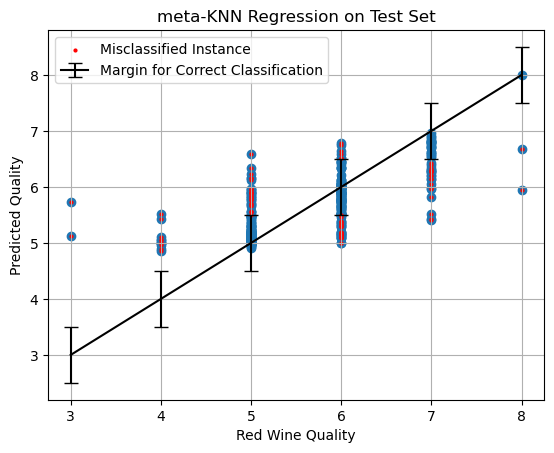

In [11]:
# plot meta-KNN regression results on test set
plt.scatter(y_test+3, y_pred_raw+3)
plt.scatter(misclassed_label+3, misclassed_output+3, color='red', s=4, label='Misclassified Instance')
plt.errorbar([3, 4, 5, 6, 7, 8], [3, 4, 5, 6, 7, 8], yerr=0.5, color='black', capsize=5, label = 'Margin for Correct Classification')
plt.grid()
plt.title('meta-KNN Regression on Test Set')
plt.ylabel('Predicted Quality')
plt.xlabel('Red Wine Quality')
plt.legend()
plt.show()